In [1]:
import climlab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_volume_domains(num_lev=30, num_lat=30, num_lon=30, water_depth=1.0, **kwargs):
    '''
    Create 3D volumes
    '''
    
    # make axes
    latax = climlab.domain.axis.Axis(axis_type='lat', num_points=num_lat)
    lonax = climlab.domain.axis.Axis(axis_type='lon', num_points=num_lon)
    levax = climlab.domain.axis.Axis(axis_type='lev', num_points=num_lev)
    depax = climlab.domain.axis.Axis(axis_type='depth', bounds=[water_depth, 0.0])
    
    # make ocean
    slab = climlab.domain.domain.SlabOcean(axes={'lat':latax, 'lon':lonax, 'depth':depax}, **kwargs)
    
    # make atmosphere
    atm = climlab.domain.domain.Atmosphere(axes={'lat':latax, 'lon':lonax, 'lev':levax}, **kwargs)
    
    # return the domains
    return slab, atm
    
def volume_state(num_lev=10, num_lat=20, num_lon=30, water_depth=1.0):
    '''
    Create a 3D climlab state
    '''
    
    # make domains
    sfc, atm = make_volume_domains(num_lev=num_lev, num_lat=num_lat, num_lon=num_lon, water_depth=water_depth)
    
    # update elevation value
    num_lev = atm.lev.num_points
    
    # make fields
    Ts = climlab.domain.field.Field(288.*np.ones(sfc.shape), domain=sfc)
    Tinitial = np.tile(np.linspace(200., 288.-10., num_lev), sfc.shape)
    Tatm = climlab.domain.field.Field(Tinitial, domain=atm)
    
    # create state
    state = climlab.utils.attrdict.AttrDict()
    state['Ts'] = Ts
    state['Tatm'] = Tatm
    
    # return the state
    return state  

In [3]:
state = volume_state()

In [4]:
state['Ts'].shape

(20, 30, 1)

In [5]:
state.keys()

dict_keys(['Ts', 'Tatm'])

In [6]:
state.pop('Tatm')

Field([[[200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        ...,
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ]],

       [[200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        [200.        , 208.66666667, 217.33333333, ..., 260.66666667,
         269.33333333, 278.        ],
        ...,


In [7]:
state.keys()

dict_keys(['Ts'])

In [18]:
state['sfc'] = state['Ts']
state['default'] = state['Ts']

In [15]:
model.domains

{'Ts': <climlab.domain.domain.SlabOcean at 0x7f7320e12e50>,
 'sfc': <climlab.domain.domain.SlabOcean at 0x7f7320e12e50>}

In [26]:
model = climlab.TimeDependentProcess(state=state)
model.add_subprocess('Sun', climlab.radiation.insolation.DailyInsolation(state=state))
model.add_subprocess('ABT', climlab.radiation.Boltzmann(state=state))

In [27]:
model.integrate_years()

Integrating for 365 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 0.9993368783782377 years.


In [28]:
model.Ts.shape

(20, 30, 1)

In [30]:
model.state

AttrDict({'Ts': Field([[[-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819]],

       [[-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
        [-213.84648819],
       

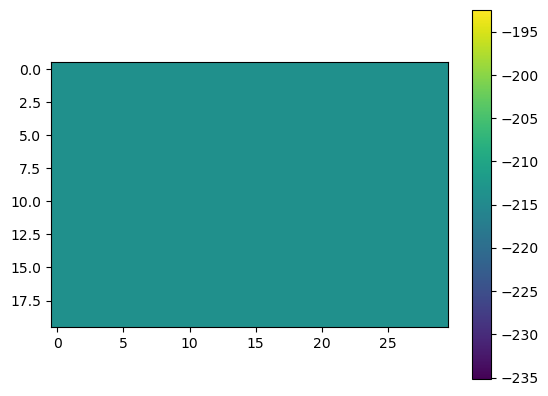

In [29]:
plt.imshow(model.Ts[:,:,0])
plt.colorbar()